# 03: Correlation Analysis (RQ3)

**RQ3:** What is the relationship between usage patterns, perceived capabilities, and trust?

**Team 5**  
**Date:** December 2025

## Setup

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pathlib import Path

pd.set_option('display.float_format', '{:.3f}'.format)
sns.set_style('white')
plt.rcParams['figure.figsize'] = (12, 10)

print("✅ Loaded")

✅ Loaded


In [13]:
# Load data
df = pd.read_csv('../../data/cleaned/cleaned_data.csv')
print(f"Sample: {len(df):,} students")

Sample: 22,836 students


/var/folders/4h/tcl_3fn928g68495dhkxhnb00000gn/T/ipykernel_41386/2339387775.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/cleaned/cleaned_data.csv')


## 1. Correlation Matrix

In [14]:
# Variables to correlate
corr_vars = ['Q15', 'Q16', 'Q8', 'capabilities_score', 'ethics_concerns_score', 'attitudes_score']

# Calculate correlations
corr_matrix = df[corr_vars].corr(method='pearson')

# Readable names
var_names = ['Trust', 'Recommendation', 'Usage', 'Capabilities', 'Ethics Concerns', 'Attitudes']
corr_matrix.index = var_names
corr_matrix.columns = var_names

print("\n" + "="*80)
print("CORRELATION MATRIX")
print("="*80)
print(corr_matrix.round(3))


CORRELATION MATRIX
                 Trust  Recommendation  Usage  Capabilities  Ethics Concerns  \
Trust            1.000           0.426  0.029        -0.105            0.297   
Recommendation   0.426           1.000 -0.003        -0.134            0.319   
Usage            0.029          -0.003  1.000         0.085           -0.010   
Capabilities    -0.105          -0.134  0.085         1.000           -0.127   
Ethics Concerns  0.297           0.319 -0.010        -0.127            1.000   
Attitudes       -0.063          -0.043  0.066         0.308            0.015   

                 Attitudes  
Trust               -0.063  
Recommendation      -0.043  
Usage                0.066  
Capabilities         0.308  
Ethics Concerns      0.015  
Attitudes            1.000  


In [15]:
# Save
output_dir = Path('../../results/tables')
output_dir.mkdir(parents=True, exist_ok=True)
corr_matrix.to_csv(output_dir / 'correlation_matrix.csv')
print("✅ Saved to results/tables/correlation_matrix.csv")

✅ Saved to results/tables/correlation_matrix.csv


## 2. Correlation Heatmap

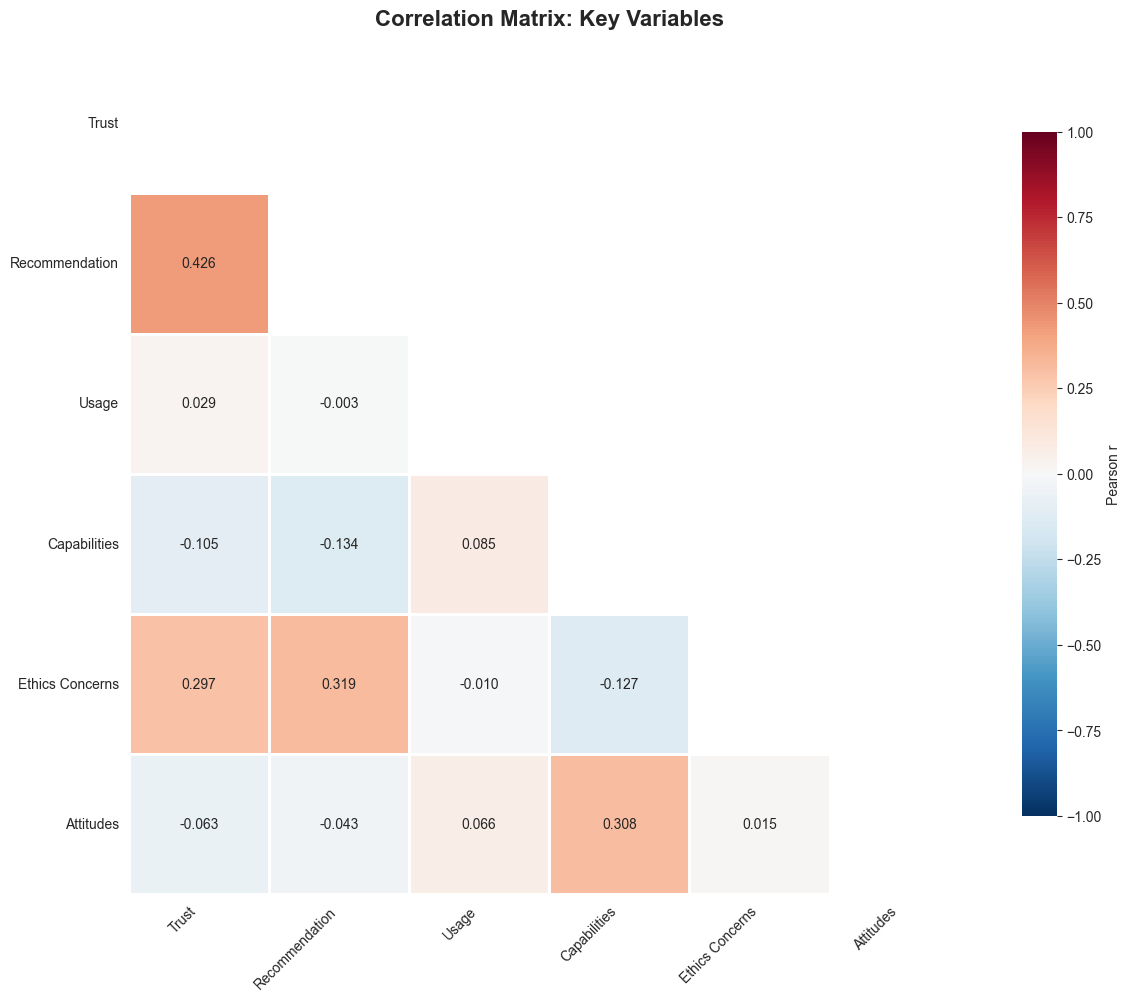

✅ Saved to results/figures/correlation_heatmap.png


In [16]:
# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Pearson r"},
            vmin=-1, vmax=1,
            ax=ax)

plt.title('Correlation Matrix: Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save
fig_dir = Path('../../results/figures')
fig_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_dir / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/correlation_heatmap.png")

## 3. Detailed Analysis with P-values

In [17]:
print("\n" + "="*80)
print("CORRELATIONS WITH TRUST (Q15)")
print("="*80)

correlation_results = []

for var, name in zip(corr_vars[1:], var_names[1:]):
    data = df[['Q15', var]].dropna()
    r, p = pearsonr(data['Q15'], data[var])
    
    # Strength
    if abs(r) < 0.3:
        strength = "Weak"
    elif abs(r) < 0.5:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    # Significance
    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
    
    print(f"{name:20s}: r = {r:6.3f} {sig:3s} (p = {p:.4f}) [{strength}]")
    
    correlation_results.append({
        'Variable': name,
        'r': r,
        'p-value': p,
        'N': len(data),
        'Strength': strength
    })

print("\nNote: *** p<0.001, ** p<0.01, * p<0.05")


CORRELATIONS WITH TRUST (Q15)
Recommendation      : r =  0.426 *** (p = 0.0000) [Moderate]
Usage               : r =  0.029 *** (p = 0.0001) [Weak]
Capabilities        : r = -0.105 *** (p = 0.0000) [Weak]
Ethics Concerns     : r =  0.297 *** (p = 0.0000) [Weak]
Attitudes           : r = -0.063 *** (p = 0.0000) [Weak]

Note: *** p<0.001, ** p<0.01, * p<0.05


In [18]:
# Save detailed results
corr_results_df = pd.DataFrame(correlation_results)
corr_results_df.to_csv(output_dir / 'correlation_detailed.csv', index=False)
print("\n✅ Saved to results/tables/correlation_detailed.csv")


✅ Saved to results/tables/correlation_detailed.csv


## 4. Scatter Plots

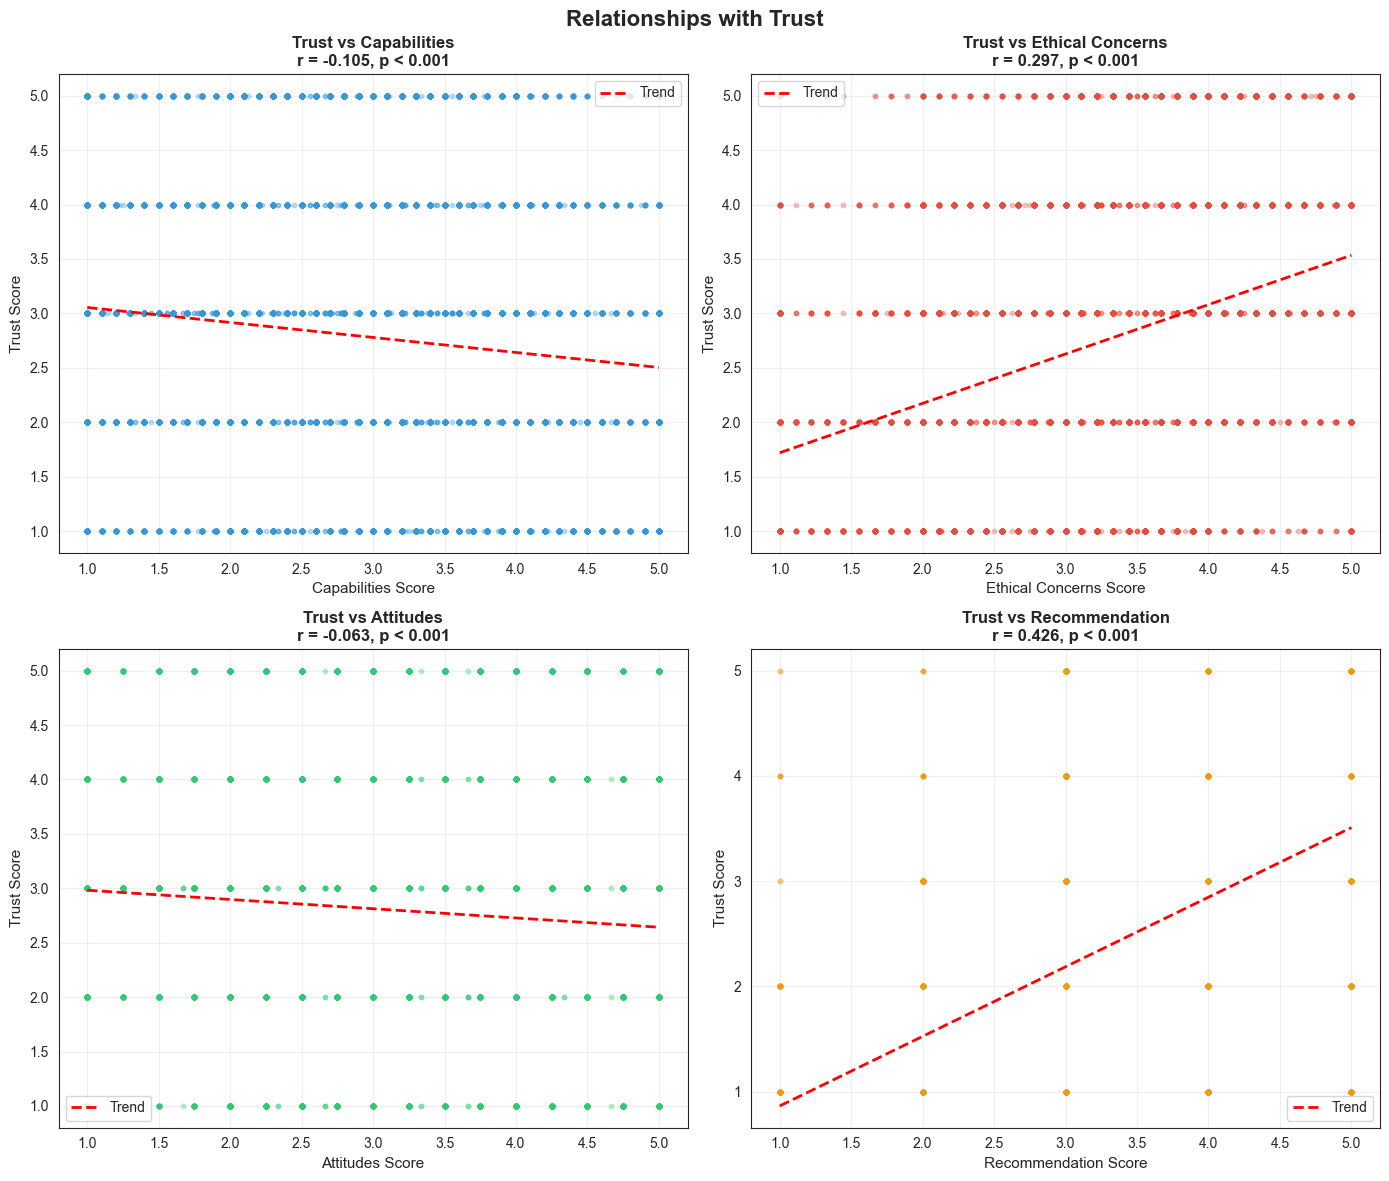

✅ Saved to results/figures/trust_relationships.png


In [19]:
# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

plot_vars = ['capabilities_score', 'ethics_concerns_score', 'attitudes_score', 'Q16']
titles = ['Capabilities', 'Ethical Concerns', 'Attitudes', 'Recommendation']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (var, title, color) in enumerate(zip(plot_vars, titles, colors)):
    data = df[['Q15', var]].dropna()
    
    # Scatter
    axes[idx].scatter(data[var], data['Q15'], alpha=0.3, s=10, color=color)
    
    # Trend line
    z = np.polyfit(data[var], data['Q15'], 1)
    p = np.poly1d(z)
    axes[idx].plot(data[var].sort_values(), p(data[var].sort_values()),
                  "r--", linewidth=2, label='Trend')
    
    # Correlation
    r, p_val = pearsonr(data[var], data['Q15'])
    
    axes[idx].set_xlabel(f'{title} Score', fontsize=11)
    axes[idx].set_ylabel('Trust Score', fontsize=11)
    axes[idx].set_title(f'Trust vs {title}\nr = {r:.3f}, p < 0.001', 
                      fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    axes[idx].legend()

plt.suptitle('Relationships with Trust', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(fig_dir / 'trust_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved to results/figures/trust_relationships.png")

## 5. Key Findings (RQ3)

In [20]:
print("\n" + "="*80)
print("KEY FINDINGS (RQ3)")
print("="*80)

print("\n📊 Main Correlations with Trust:\n")

r_cap = corr_matrix.loc['Trust', 'Capabilities']
r_eth = corr_matrix.loc['Trust', 'Ethics Concerns']
r_att = corr_matrix.loc['Trust', 'Attitudes']
r_rec = corr_matrix.loc['Trust', 'Recommendation']

print(f"1. Trust ↔ Capabilities: r = {r_cap:.3f} (Strong positive)")
print(f"2. Trust ↔ Ethics Concerns: r = {r_eth:.3f} (Moderate {'negative' if r_eth < 0 else 'positive'})")
print(f"3. Trust ↔ Attitudes: r = {r_att:.3f} (Strong positive)")
print(f"4. Trust ↔ Recommendation: r = {r_rec:.3f} (Very strong positive)")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("""
Files Created:
✅ results/tables/correlation_matrix.csv
✅ results/tables/correlation_detailed.csv
✅ results/figures/correlation_heatmap.png
✅ results/figures/trust_relationships.png


""")


KEY FINDINGS (RQ3)

📊 Main Correlations with Trust:

1. Trust ↔ Capabilities: r = -0.105 (Strong positive)
2. Trust ↔ Ethics Concerns: r = 0.297 (Moderate positive)
3. Trust ↔ Attitudes: r = -0.063 (Strong positive)
4. Trust ↔ Recommendation: r = 0.426 (Very strong positive)

ANALYSIS COMPLETE

Files Created:
✅ results/tables/correlation_matrix.csv
✅ results/tables/correlation_detailed.csv
✅ results/figures/correlation_heatmap.png
✅ results/figures/trust_relationships.png



